# Cumulative Histograms of LAT data latency times

### Robert Cameron, April 2016

In [19]:
from astropy.table import Table, Column
from astropy.time import Time
import numpy as np
import bisect
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
%matplotlib inline
plt.rc('figure', figsize = [12, 10])
plt.rc('font', size = 16)

In [20]:
b = ('2015-01-01','2016-01-01')
e = ('2015-04-01','2016-04-01')
nhist = len(b)
labl = []
for i in range(nhist):
    labl.append(b[i]+" to "+e[i])

In [21]:
t0 = '2001-01-01'
t0s = Time(t0).cxcsec
metb = Time(b).cxcsec - t0s
mete = Time(e).cxcsec - t0s

In [22]:
# read regular ASCII tabular files of data

file = "/Users/rac/Documents/GLAST/ISOC/LATmetrics/latency/2016/rev.all.runs.20160424"
f = Table.read(file, format = 'ascii')
trun = f['col1']
tslac = f['col2']
tnasa = f['col3']
total = tslac + tnasa
#trun, len(trun), len(total), tnasa[0], tslac[0], total[0]

In [23]:
percentile = (0,50,95,100)
foo = np.where(total==max(total))
bar = np.where(total==min(total))
np.percentile(total,percentile), min(total), trun[bar], max(total), trun[foo]

(array([  2.25388889e+00,   7.60790450e+00,   1.68499246e+01,
          1.20344797e+04]),
 2.2538888888888886,
 <Column name='col1' dtype='float64' length=1>
 482683739.0,
 12034.479698315832,
 <Column name='col1' dtype='float64' length=1>
 245408009.086)

In [24]:
#rdictb = {met: bisect.bisect(trun, met, 0, len(trun)) for met in metb}
#rdicte = {met: bisect.bisect(trun, met, 0, len(trun)) for met in mete}
ridxb = []
ridxe = []
for i in range(nhist):
    ridxb.append(bisect.bisect(trun, metb[i]))
    ridxe.append(bisect.bisect(trun, mete[i]))

In [25]:
percentile = (0,50,95,100)
foo = np.where(total==max(total))
bar = np.where(total==min(total))
np.percentile(total,percentile), min(total), trun[bar], max(total), trun[foo]

(array([  2.25388889e+00,   7.60790450e+00,   1.68499246e+01,
          1.20344797e+04]),
 2.2538888888888886,
 <Column name='col1' dtype='float64' length=1>
 482683739.0,
 12034.479698315832,
 <Column name='col1' dtype='float64' length=1>
 245408009.086)

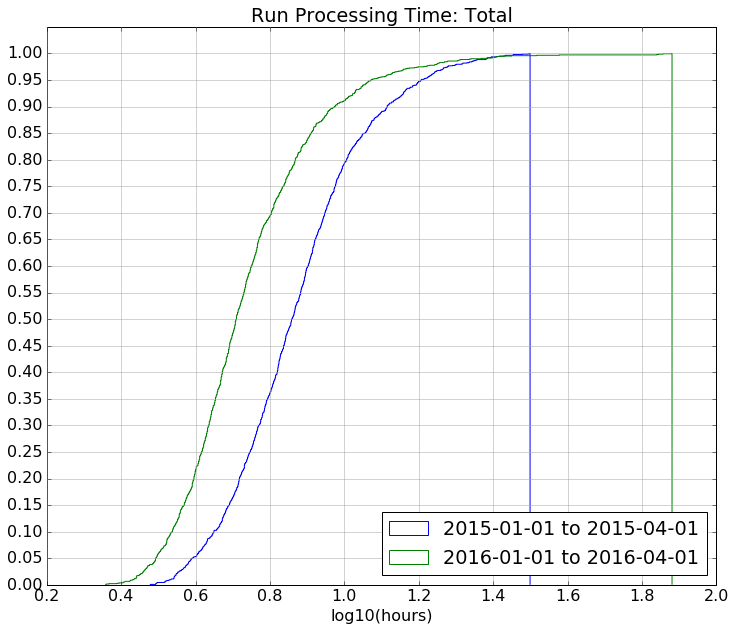

In [26]:
n_bins = 1000
times = np.log10(total)
type = "Total"
plt.title('Run Processing Time: '+type)
plt.xlabel('log10(hours)')
for i in range(nhist):
    ltl = times[ridxb[i]:ridxe[i]]
    lab = labl[i]
    plt.hist(ltl, n_bins, normed=1, histtype='step', cumulative=True, label=lab)

plt.legend(loc='lower right')
plt.yticks( np.arange(21)/20 )
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.ylim(0, 1.05)
plt.show()

Times: Total
2015-01-01 to 2015-04-01  : Percentiles (0, 50, 95, 100): [  3.00722222   7.24027778  16.12088889  31.57833333]
2016-01-01 to 2016-04-01  : Percentiles (0, 50, 95, 100): [  2.28222222   5.13138889  11.8155      76.03222222]


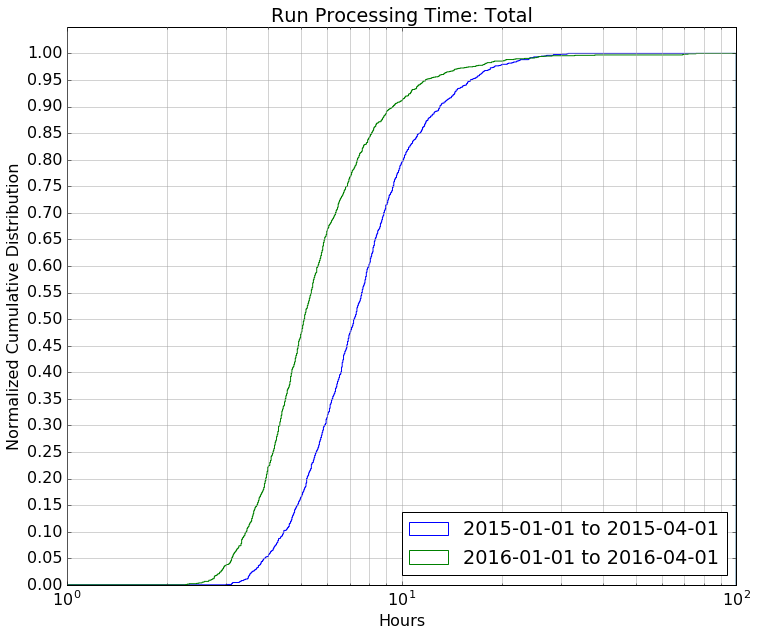

In [27]:
percentile = (0,50,95,100)
times = total
type = "Total"
print ("Times:",type)
plt.title('Run Processing Time: '+type)
plt.xlabel('log10(hours)')
plt.xscale("log")
plt.xlabel('Hours')
for i in range(nhist):
    ltl = times[ridxb[i]:ridxe[i]]
    lab = labl[i]
    plt.hist(ltl, bins = np.logspace(0, 2, 1000), normed=1, histtype='step', cumulative=True, label=lab)
    pc = np.percentile(times[ridxb[i]:ridxe[i]],percentile)
    print(lab," : Percentiles (0, 50, 95, 100):",pc)

plt.legend(loc='lower right')
plt.ylim(0, 1.05)
plt.yticks( np.arange(21)/20 )
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.title('Run Processing Time: '+type)
plt.ylabel('Normalized Cumulative Distribution')
plt.show()

Times: NASA
2015-01-01 to 2015-04-01  : Percentiles (0, 50, 95, 100): [  1.09361111   5.14194444  12.28180556  25.84027778]
2016-01-01 to 2016-04-01  : Percentiles (0, 50, 95, 100): [  0.98194444   3.24083333   6.61055556  12.46472222]


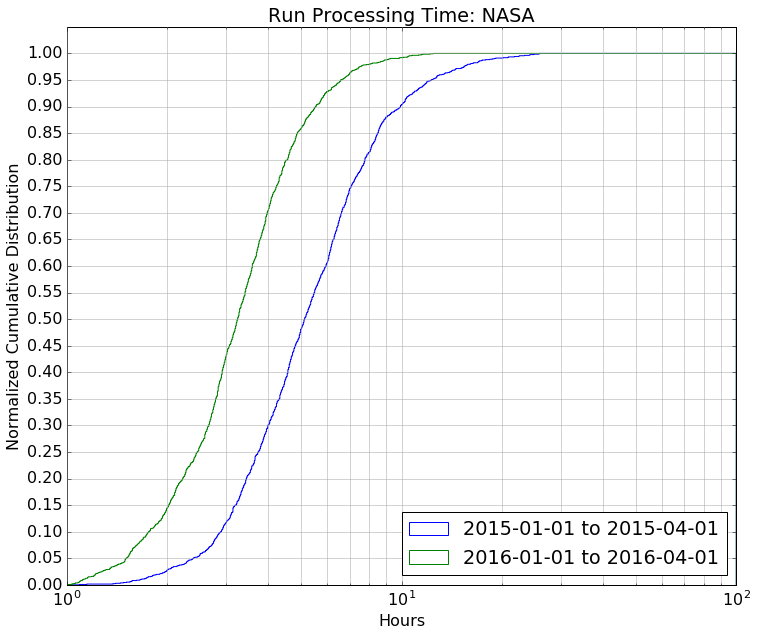

In [28]:
times = tnasa
type = "NASA"
print ("Times:",type)
plt.title('Run Processing Time: '+type)
plt.xlabel('log10(hours)')

plt.xscale("log")
plt.xlabel('Hours')
for i in range(nhist):
    ltl = times[ridxb[i]:ridxe[i]]
    lab = labl[i]
    plt.hist(ltl, bins = np.logspace(0, 2, 1000), normed=1, histtype='step', cumulative=True, label=lab)
    pc = np.percentile(times[ridxb[i]:ridxe[i]],percentile)
    print(lab," : Percentiles (0, 50, 95, 100):",pc)

plt.legend(loc='lower right')
plt.ylim(0, 1.05)
plt.yticks( np.arange(21)/20 )
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.title('Run Processing Time: '+type)
plt.ylabel('Normalized Cumulative Distribution')
plt.show()

Times: SLAC
2015-01-01 to 2015-04-01  : Percentiles (0, 50, 95, 100): [  0.58027778   1.53333333   6.22605556  23.51527778]
2016-01-01 to 2016-04-01  : Percentiles (0, 50, 95, 100): [  0.56138889   1.49138889   7.78327778  71.38388889]


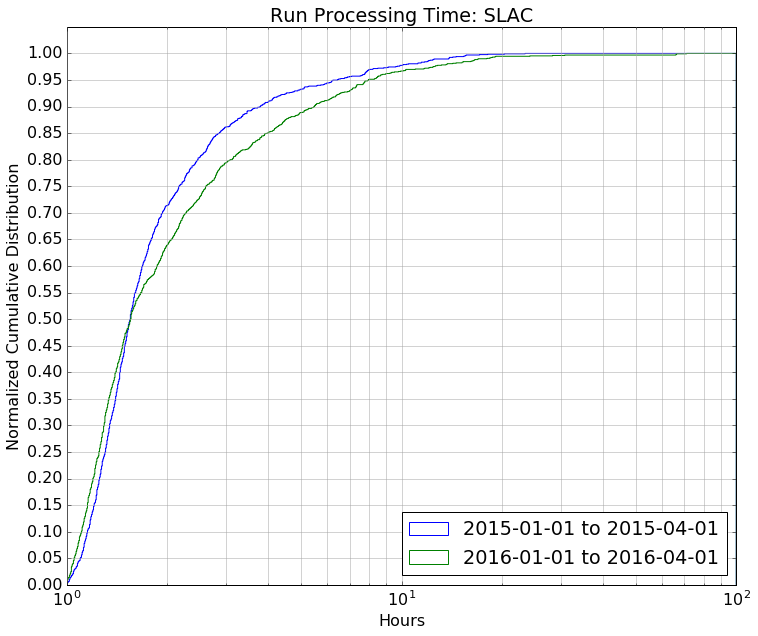

In [29]:
times = tslac
type = "SLAC"
print ("Times:",type)
plt.title('Run Processing Time: '+type)
plt.xlabel('log10(hours)')

plt.xscale("log")
plt.xlabel('Hours')
for i in range(nhist):
    ltl = times[ridxb[i]:ridxe[i]]
    lab = labl[i]
    plt.hist(ltl, bins = np.logspace(0, 2, 1000), normed=1, histtype='step', cumulative=True, label=lab)
    pc = np.percentile(times[ridxb[i]:ridxe[i]],percentile)
    print(lab," : Percentiles (0, 50, 95, 100):",pc)

plt.legend(loc='lower right')
plt.ylim(0, 1.05)
plt.yticks( np.arange(21)/20 )
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.title('Run Processing Time: '+type)
plt.ylabel('Normalized Cumulative Distribution')
plt.show()